# **QSAR Model Building of dardarin**


# Read in data

In [2]:
import pandas as pd

In [28]:
dataset_url = '/content/dardarin_class_pIC50_pubchem_fp (1).csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.879426
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.795880
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.886057
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.107905
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.221849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.744727
1836,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.200659
1837,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.455932
1838,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000


In [29]:
dataset = dataset.fillna(0)

In [30]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1836,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1837,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1838,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
Y = dataset.iloc[:,-1]
Y

0       4.879426
1       7.795880
2       7.886057
3       8.107905
4       8.221849
          ...   
1835    8.744727
1836    8.200659
1837    8.455932
1838    6.000000
1839    6.703335
Name: pIC50, Length: 1840, dtype: float64

# Remove low variance features

In [32]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP18,PubchemFP19,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP143,PubchemFP145,PubchemFP146,...,PubchemFP716,PubchemFP721,PubchemFP734,PubchemFP735,PubchemFP758,PubchemFP779,PubchemFP784,PubchemFP797,PubchemFP798,PubchemFP821
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1
1,1,1,1,1,0,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,1
2,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0,...,1,0,0,1,1,1,0,0,1,1
4,1,1,1,1,0,0,0,0,0,0,...,1,0,0,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,1,1,1,1,0,0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,1
1836,1,1,1,1,0,0,0,1,1,1,...,0,1,0,1,1,0,1,0,1,1
1837,1,1,1,1,0,0,0,1,1,1,...,0,1,0,1,1,0,1,0,1,1
1838,1,1,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X.to_csv('descriptor_list.csv', index = False)

In [34]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8143055685763203

## Model Prediction

In [37]:
Y_pred = model.predict(X)
Y_pred

array([5.65252737, 7.54638302, 7.70299293, ..., 7.92206173, 6.06046653,
       6.94094051])

## Model Performance

In [38]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.15
Coefficient of determination (R^2): 0.81


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [39]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

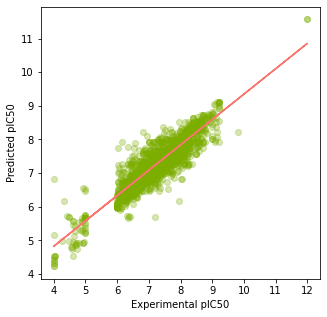

In [40]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [41]:
import pickle

In [42]:
pickle.dump(model, open('dardarin_model.pkl', 'wb'))